In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


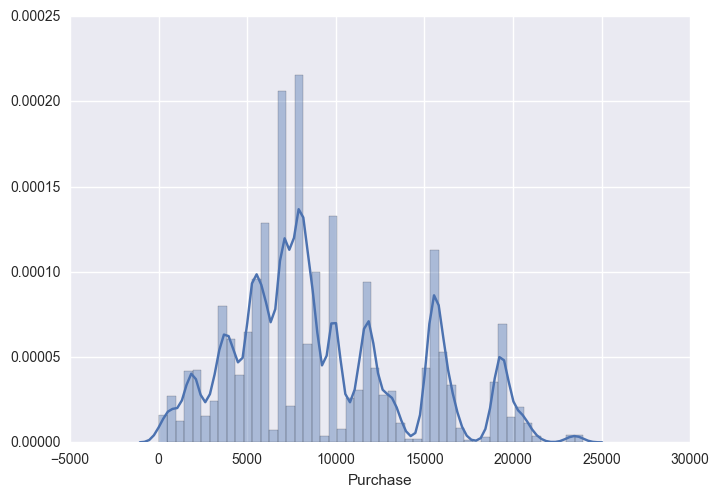

In [5]:
sns.distplot(train['Purchase'])

In [6]:
print "The skewness of Purchase is {}".format(train['Purchase'].skew())

The skewness of Purchase is 0.600140003709


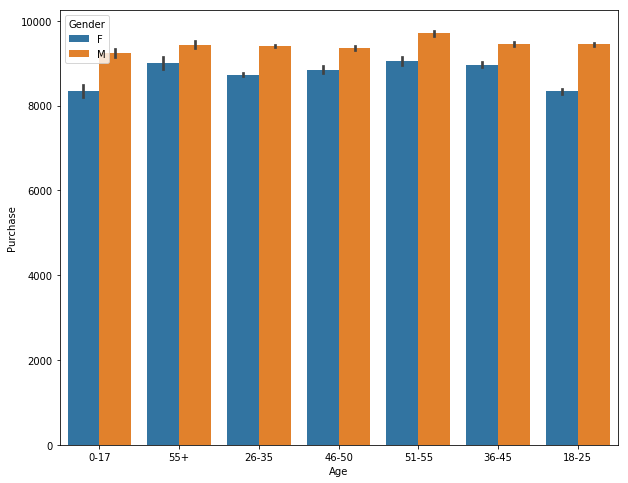

In [8]:
ax = sns.barplot(x='Age', y='Purchase', hue='Gender', data=train)

In [11]:
train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
pivot = train.pivot_table(index='Occupation', values='Purchase', aggfunc=np.sum)
pivot.sort

<bound method Series.sort of Occupation
0     635406958
1     424614144
2     238028583
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
20    296570442
Name: Purchase, dtype: int64>

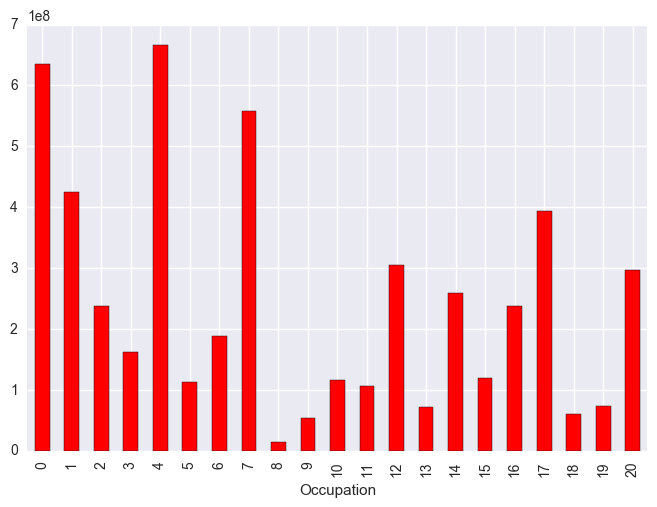

In [17]:
pivot.plot(kind='bar', color='red')

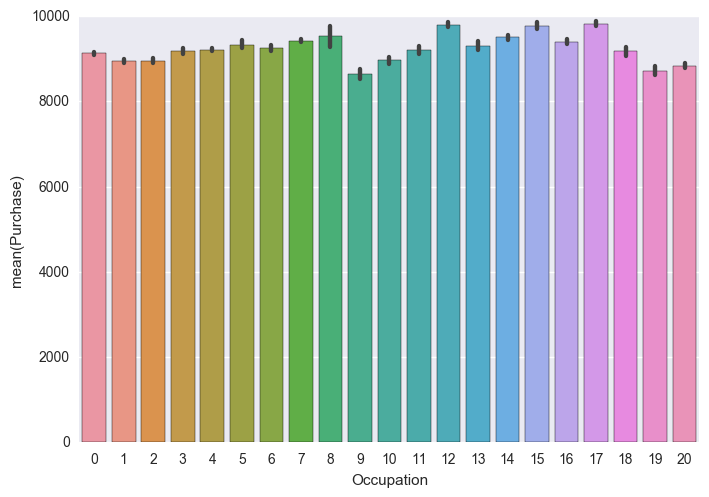

In [11]:
sns.barplot(x='Occupation', y='Purchase', data=train)

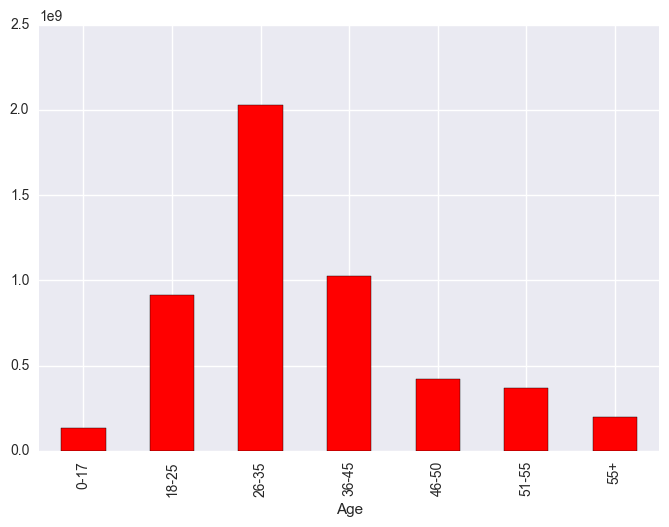

In [15]:
pivot_Age = train.pivot_table(index='Age', values='Purchase', aggfunc=np.sum)
pivot_Age.plot(kind='bar', color='red')

In [5]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({"0":0,"1":1,"2":2,"3":3,"4+":4})
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map({"0":0,"1":1,"2":2,"3":3,"4+":4})

train['City_Category'] = train['City_Category'].map({"A":1,"B":2,"C":3}).astype(int)
test['City_Category'] = test['City_Category'].map({"A":1,"B":2,"C":3}).astype(int)

train['Gender'] = train['Gender'].map({"F":0,"M":1})
test['Gender'] = test['Gender'].map({"F":0,"M":1})

train['Age'] = train['Age'].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7}).astype(int)
test['Age'] = test['Age'].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7}).astype(int)

0    2
1    2
2    2
3    2
4    4
5    3
6    2
7    2
8    2
9    1
Name: Stay_In_Current_City_Years, dtype: int64

In [33]:
category_count_list = []
for p1 in (train[['Product_Category_2','Product_Category_3']].values):
    if ~np.isnan(p1[0]) & ~np.isnan(p1[1]):
        category_count_list.append(3)
    elif ~np.isnan(p1[0]) | ~np.isnan(p1[1]):
        category_count_list.append(2)
    else:
        category_count_list.append(1)
        
train['category_count'] = category_count_list

test_category_count_list = []
for p1 in (test[['Product_Category_2','Product_Category_3']].values):
    if ~np.isnan(p1[0]) & ~np.isnan(p1[1]):
        test_category_count_list.append(3)
    elif ~np.isnan(p1[0]) | ~np.isnan(p1[1]):
        test_category_count_list.append(2)
    else:
        test_category_count_list.append(1)
        
test['category_count'] = test_category_count_list

550068


In [15]:
train['Product_Category_2'].fillna(0, inplace=True)
train['Product_Category_2'] = train['Product_Category_2'].astype(int)
train['Product_Category_2'][:10]

0     0
1     6
2     0
3    14
4     0
5     2
6     8
7    15
8    16
9     0
Name: Product_Category_2, dtype: int64

In [16]:
test['Product_Category_2'].fillna(0, inplace=True)
test['Product_Category_2'] = test['Product_Category_2'].astype(int)
test['Product_Category_2'][:10]

0    11
1     5
2    14
3     9
4     5
5     3
6    11
7     4
8    13
9    14
Name: Product_Category_2, dtype: int64

In [17]:
train['Product_Category_3'].fillna(0, inplace=True)
train['Product_Category_3'] = train['Product_Category_3'].astype(int)
train['Product_Category_3'][:10]

0     0
1    14
2     0
3     0
4     0
5     0
6    17
7     0
8     0
9     0
Name: Product_Category_3, dtype: int64

In [18]:
test['Product_Category_3'].fillna(0, inplace=True)
test['Product_Category_3'] = test['Product_Category_3'].astype(int)
test['Product_Category_3'][:10]

0     0
1     0
2     0
3     0
4    12
5    15
6    15
7     9
8    16
9     0
Name: Product_Category_3, dtype: int64

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
category_count                550068 non-null int64
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 50.4+ MB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null int64
Age                           233599 non-null int64
Occupation                    233599 non-null int64
City_Category                 233599 non-null int64
Stay_In_Current_City_Years    233599 non-null int64
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            233599 non-null int64
Product_Category_3            233599 non-null int64
dtypes: int64(10), object(1)
memory usage: 19.6+ MB


In [46]:
train_User_ID = train['User_ID']
train_Product_ID = train['Product_ID']

In [47]:
predictor_variables = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status',
                      'Product_Category_1','category_count']
target_variable = ['Purchase']

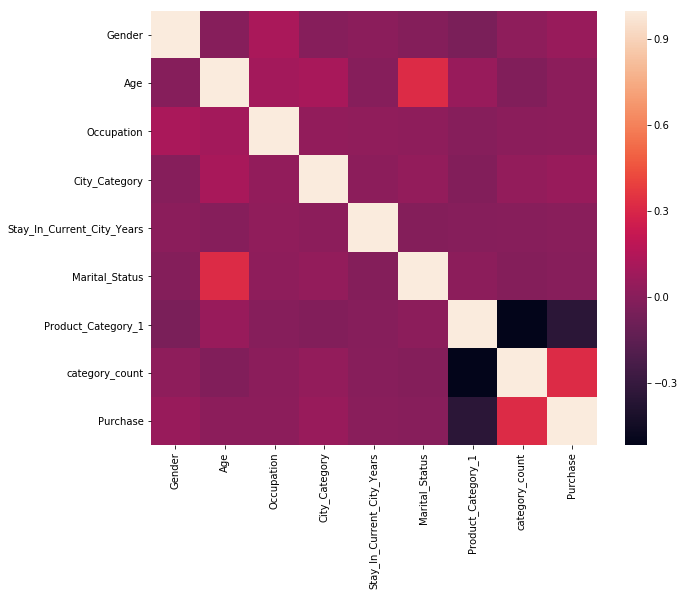

In [45]:
corr = train[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status',
                      'Product_Category_1','category_count','Purchase']].corr()
sns.heatmap(corr)

In [48]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\program files\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [49]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [51]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target_variable].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_xgb_params()['n_estimators'], nfold=cv_folds,
                         metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    alg.fit(dtrain[predictors], dtrain[target_variable], eval_metric='rmse')
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    print ("\nModel Report")
    print ("Root Mean Squared Error: %.4g" % rmse(dtrain[target_variable].values, dtrain_predictions))
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance score')

In [52]:
xgb1 = XGBRegressor(learning_rate=0.1,
                   n_estimators=1000,
                   max_depth=5,
                   min_child_weight=1,
                   gamma=0,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   n_jobs=4,
                   scale_pos_weight=1,
                   random_state=27)


Model Report
Root Mean Squared Error: 2923


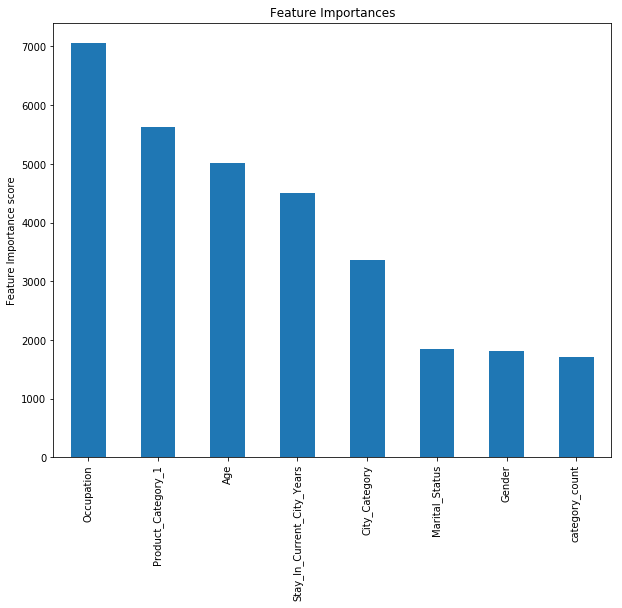

In [53]:
modelfit(xgb1, train, predictor_variables)

In [24]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,
                   n_estimators=200,
                   max_depth=5,
                   min_child_weight=1,
                   gamma=0,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   n_jobs=4,
                   scale_pos_weight=1,
                   random_state=27), param_grid=param_test1,
                       scoring='mean_squared_error',
                       n_jobs=4,
                       iid=False,
                       cv=5)

gsearch1.fit(train[predictor_variables], train[target_variable])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -8806123.94078, std: 28626.14475, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -8806124.84976, std: 28625.92103, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -8801119.42021, std: 34656.22319, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -8418731.03847, std: 103109.91163, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -8434080.66491, std: 102639.68918, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -8417175.30076, std: 97318.49681, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -8134509.65851, std: 163001.18487, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -8190785.58516, std: 135280.72341, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -8151121.28558, std: 138252.88321, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -7789038.42533, std: 330510.06209, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -7927204.93561, std: 315909.30454, params: {'max_depth': 9, 'min_child_weigh

In [ ]:
param_test2 = {
    'max_depth':range(9,18,2),
    'min_child_weight':range(5,12,2)
}

gsearch2 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,
                   n_estimators=200,
                   max_depth=5,
                   min_child_weight=1,
                   gamma=0,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   n_jobs=5,
                   scale_pos_weight=1,
                   random_state=27), param_grid=param_test2,
                       scoring='mean_squared_error',
                       n_jobs=5,
                       iid=False,
                       cv=5)

gsearch2.fit(train[predictor_variables], train[target_variable])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_